<center><h1>Moore_Andrew_HW4</h1></center>
<br>
<br>

Name: Andrew Moore
<br>
Github Username: drewm8080
<br>
USC ID: 7583780941

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [65]:
import pandas as pd 
import numpy as np

from scipy.stats import bootstrap
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import warnings
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
import seaborn as sns
#pip install scikit-plot
#import scikitplot as skplt
import matplotlib.pyplot as plt
import statsmodels.api as sm
#!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as skm
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import multilabel_confusion_matrix


Get the AReM Data Set

In [57]:
warnings.filterwarnings('ignore')

### (b) Splitting Data

In [160]:
folders= ['bending1', 'bending2','cycling','lying','sitting','standing','walking']
train = []
test = []
bending1_data_range= range(1,8)
bending2_data_range = range(1,7)
other_data_range = range(1,16)
for file in folders:
    # handling bending data
    if file == 'bending1': 
        for i in bending1_data_range:
            # reading in the data 
            df= pd.read_csv(f'../data/{file}/dataset{i}.csv',skiprows= 4)
            if (i == 1) or (i==2):
                test.append(df)
            else:
                train.append(df)
    # bending data 2 has a different amount of instances
    elif file== 'bending2':
             # reading in the data 
            for i in bending2_data_range:
                df= pd.read_csv(f'../data/{file}/dataset{i}.csv',skiprows= 4)
                if (i == 1) or (i==2):
                    test.append(df)
                else:
                    train.append(df)
        
        
    # handling all other types of data             
    else:
        for i in other_data_range:
            df= pd.read_csv(f'../data/{file}/dataset{i}.csv',skiprows= 4)
            df=df.dropna()
            if (i == 1) or (i==2) or (i==3):
                test.append(df)
            else:
                train.append(df)

# training                 
train_df = pd.concat(train,axis=0)
train_df = train_df.drop(columns = '# Columns: time')


# testing 
test_df = pd.concat(test,axis=0)
test_df = test_df.drop(columns = '# Columns: time')

### (c) Feature Extraction

In [161]:
df = pd.DataFrame(columns = ["min1", "max1", "mean1","median1",'std dev1','1st Q1','3rd Q1',
                            "min2", "max2", "mean2","median2",'std dev2','1st Q2','3rd Q2',
                            "min3", "max3", "mean3","median3",'std dev3','1st Q3','3rd Q3',
                            "min4", "max4", "mean4","median4",'std dev4','1st Q4','3rd Q4',
                            "min5", "max5", "mean5","median5",'std dev5','1st Q5','3rd Q5',
                            "min6", "max6", "mean6","median6",'std dev6','1st Q6','3rd Q6'])
print(df)

Empty DataFrame
Columns: [min1, max1, mean1, median1, std dev1, 1st Q1, 3rd Q1, min2, max2, mean2, median2, std dev2, 1st Q2, 3rd Q2, min3, max3, mean3, median3, std dev3, 1st Q3, 3rd Q3, min4, max4, mean4, median4, std dev4, 1st Q4, 3rd Q4, min5, max5, mean5, median5, std dev5, 1st Q5, 3rd Q5, min6, max6, mean6, median6, std dev6, 1st Q6, 3rd Q6]
Index: []

[0 rows x 42 columns]


In [162]:
def statistics(dataframe):
    cleaned_df = dataframe.drop(columns='# Columns: time')
    df_stats = cleaned_df.describe().transpose()
    # getting stats
    min1 = df_stats.iloc[0,3]
    min2 = df_stats.iloc[1,3]
    min3 = df_stats.iloc[2,3]
    min4 = df_stats.iloc[3,3]
    min5 = df_stats.iloc[4,3]
    min6 = df_stats.iloc[5,3]
    
    max1= df_stats.iloc[0,-1]
    max2= df_stats.iloc[1,-1]
    max3= df_stats.iloc[2,-1]
    max4= df_stats.iloc[3,-1]
    max5= df_stats.iloc[4,-1]
    max6= df_stats.iloc[5,-1]
    
    mean1= df_stats.iloc[0,1]
    mean2= df_stats.iloc[1,1]
    mean3= df_stats.iloc[2,1]
    mean4= df_stats.iloc[3,1]
    mean5= df_stats.iloc[4,1]
    mean6= df_stats.iloc[5,1]
    
    std1= df_stats.iloc[0,2]
    std2= df_stats.iloc[1,2]
    std3= df_stats.iloc[2,2]
    std4= df_stats.iloc[3,2]
    std5= df_stats.iloc[4,2]
    std6= df_stats.iloc[5,2]
    
    q11= df_stats.iloc[0,4]
    q12= df_stats.iloc[1,4]
    q13= df_stats.iloc[2,4]
    q14= df_stats.iloc[3,4]
    q15= df_stats.iloc[4,4]
    q16= df_stats.iloc[5,4]
    
    q31= df_stats.iloc[0,6]
    q32= df_stats.iloc[1,6]
    q33= df_stats.iloc[2,6]
    q34= df_stats.iloc[3,6]
    q35= df_stats.iloc[4,6]
    q36= df_stats.iloc[5,6]
    
    median1= df_stats.iloc[0,5]
    median2= df_stats.iloc[1,5]
    median3= df_stats.iloc[2,5]
    median4= df_stats.iloc[3,5]
    median5= df_stats.iloc[4,5]
    median6= df_stats.iloc[5,5]
    
    final_list = [min1,max1,mean1,median1,std1,q11,q31,
                 min2,max2,mean2,median2,std2,q12,q32,
                 min3,max3,mean3,median3,std3,q13,q33,
                 min4,max4,mean4,median4,std4,q14,q34,
                 min5,max5,mean5,median5,std5,q15,q35,
                 min6,max6,mean6,median6,std6,q16,q36]
    
    return final_list

In [163]:
folders= ['bending1', 'bending2','cycling','lying','sitting','standing','walking']
train = []
test = []
bending1_data_range= range(1,8)
bending2_data_range = range(1,7)
other_data_range = range(1,16)


time_domain_features = pd.DataFrame(columns = ["min1", "max1", "mean1","median1",'std dev1','1st Q1','3rd Q1',
                            "min2", "max2", "mean2","median2",'std dev2','1st Q2','3rd Q2',
                            "min3", "max3", "mean3","median3",'std dev3','1st Q3','3rd Q3',
                            "min4", "max4", "mean4","median4",'std dev4','1st Q4','3rd Q4',
                            "min5", "max5", "mean5","median5",'std dev5','1st Q5','3rd Q5',
                            "min6", "max6", "mean6","median6",'std dev6','1st Q6','3rd Q6'])
stat_list = []
for file in folders:
    # handling bending data
    if file == 'bending1': 
        for i in bending1_data_range:
            # reading in the data 
            df= pd.read_csv(f'../data/{file}/dataset{i}.csv',skiprows= 4)
            if (i == 1) or (i==2):
                result = statistics(df)
                stat_list.append(result)
            else:
                result = statistics(df)
                stat_list.append(result)
    # bending data 2 has a different amount of instances
    elif file== 'bending2':
             # reading in the data 
            for i in bending2_data_range:
                df= pd.read_csv(f'../data/{file}/dataset{i}.csv',skiprows= 4)
                if (i == 1) or (i==2):
                    result = statistics(df)
                    stat_list.append(result)
                else:
                    result = statistics(df)
                    stat_list.append(result)
        
    # handling all other types of data             
    else:
        for i in other_data_range:
            df= pd.read_csv(f'../data/{file}/dataset{i}.csv',skiprows= 4)
            if (i == 1) or (i==2) or (i==3):
                result = statistics(df)
                stat_list.append(result)
            else:
                result = statistics(df)
                stat_list.append(result)

In [164]:
full_stats_df = pd.DataFrame(stat_list,columns= time_domain_features.columns)
full_stats_df

,min1,max1,mean1,median1,std dev1,1st Q1,3rd Q1,min2,max2,mean2,...,std dev5,1st Q5,3rd Q5,min6,max6,mean6,median6,std dev6,1st Q6,3rd Q6
0,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000
1,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,0.372438,...,1.995255,32.0000,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000
2,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400
3,33.00,47.75,42.179813,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000
4,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,3.283983,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225
84,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,3.119856,13.5000,17.75,0.00,9.67,3.432562,3.20,1.732727,2.1575,4.5650
85,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,2.823124,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350
86,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,3.131076,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000


In [165]:
full_stats_df.describe().loc[['std']].transpose()


,std
min1,9.569975
max1,4.394362
mean1,5.335718
median1,5.440054
std dev1,1.772153
1st Q1,6.153590
3rd Q1,5.138925
min2,0.000000
max2,5.062729
mean2,1.574164


In [166]:
# reference -- https://www.statology.org/bootstrapping-in-python/
columns = full_stats_df.columns

for column in columns:
    data = (full_stats_df[f'{column}'],)
    bootstrap_ci = bootstrap(data, np.median, confidence_level=0.90,
                             random_state=1, method='percentile')
    print("The confidence interval for",column,"is",bootstrap_ci.confidence_interval)

The confidence interval for min1 is ConfidenceInterval(low=26.75, high=33.25)
The confidence interval for max1 is ConfidenceInterval(low=45.25, high=46.25)
The confidence interval for mean1 is ConfidenceInterval(low=37.1143125, high=42.11158333333333)
The confidence interval for median1 is ConfidenceInterval(low=36.33, high=41.5)
The confidence interval for std dev1 is ConfidenceInterval(low=2.384169571190206, high=3.555786994948472)
The confidence interval for 1st Q1 is ConfidenceInterval(low=34.5, high=39.75)
The confidence interval for 3rd Q1 is ConfidenceInterval(low=39.75, high=42.875)
The confidence interval for min2 is ConfidenceInterval(low=0.0, high=0.0)
The confidence interval for max2 is ConfidenceInterval(low=3.0, high=6.4)
The confidence interval for mean2 is ConfidenceInterval(low=0.440687500000001, high=0.5375729166666674)
The confidence interval for median2 is ConfidenceInterval(low=0.47, high=0.5)
The confidence interval for std dev2 is ConfidenceInterval(low=0.3938656

I would choose min,max and mean. Min and max would be the best for detecting outliers and mean would be the best for understanding how the average value is changing over time.

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [167]:
# feature selected statistics
def selected_statistics(dataframe):
    cleaned_df = dataframe.drop(columns='# Columns: time')
    df_stats = cleaned_df.describe().transpose()
    # getting stats
    min1 = df_stats.iloc[0,3]
    min2 = df_stats.iloc[1,3]
    min6 = df_stats.iloc[5,3]
    
    max1= df_stats.iloc[0,-1]
    max2= df_stats.iloc[1,-1]
    max6= df_stats.iloc[5,-1]
    
    mean1= df_stats.iloc[0,1]
    mean2= df_stats.iloc[1,1]
    mean6= df_stats.iloc[5,1]
    
    final_list = [min1,max1,mean1,
                 min2,max2,mean2,
                 min6,max6,mean6]
    
    return final_list

In [168]:
df= pd.read_csv(f'../data/bending1/dataset1.csv',skiprows= 4)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
# Columns: time,480.0,59875.000000,34677.081769,0.00,29937.50,59875.00,89812.50,119750.00
avg_rss12,480.0,40.624792,1.476967,37.25,39.25,40.50,42.00,45.00
var_rss12,480.0,0.358604,0.322605,0.00,0.00,0.43,0.50,1.30
avg_rss13,480.0,19.040937,4.462952,4.00,16.00,19.25,23.25,29.50
var_rss13,480.0,0.832542,0.965659,0.00,0.00,0.50,1.12,7.23
avg_rss23,480.0,34.311292,2.188449,27.25,33.00,35.00,36.00,38.25
var_rss23,480.0,0.570583,0.582915,0.00,0.00,0.43,1.30,1.92


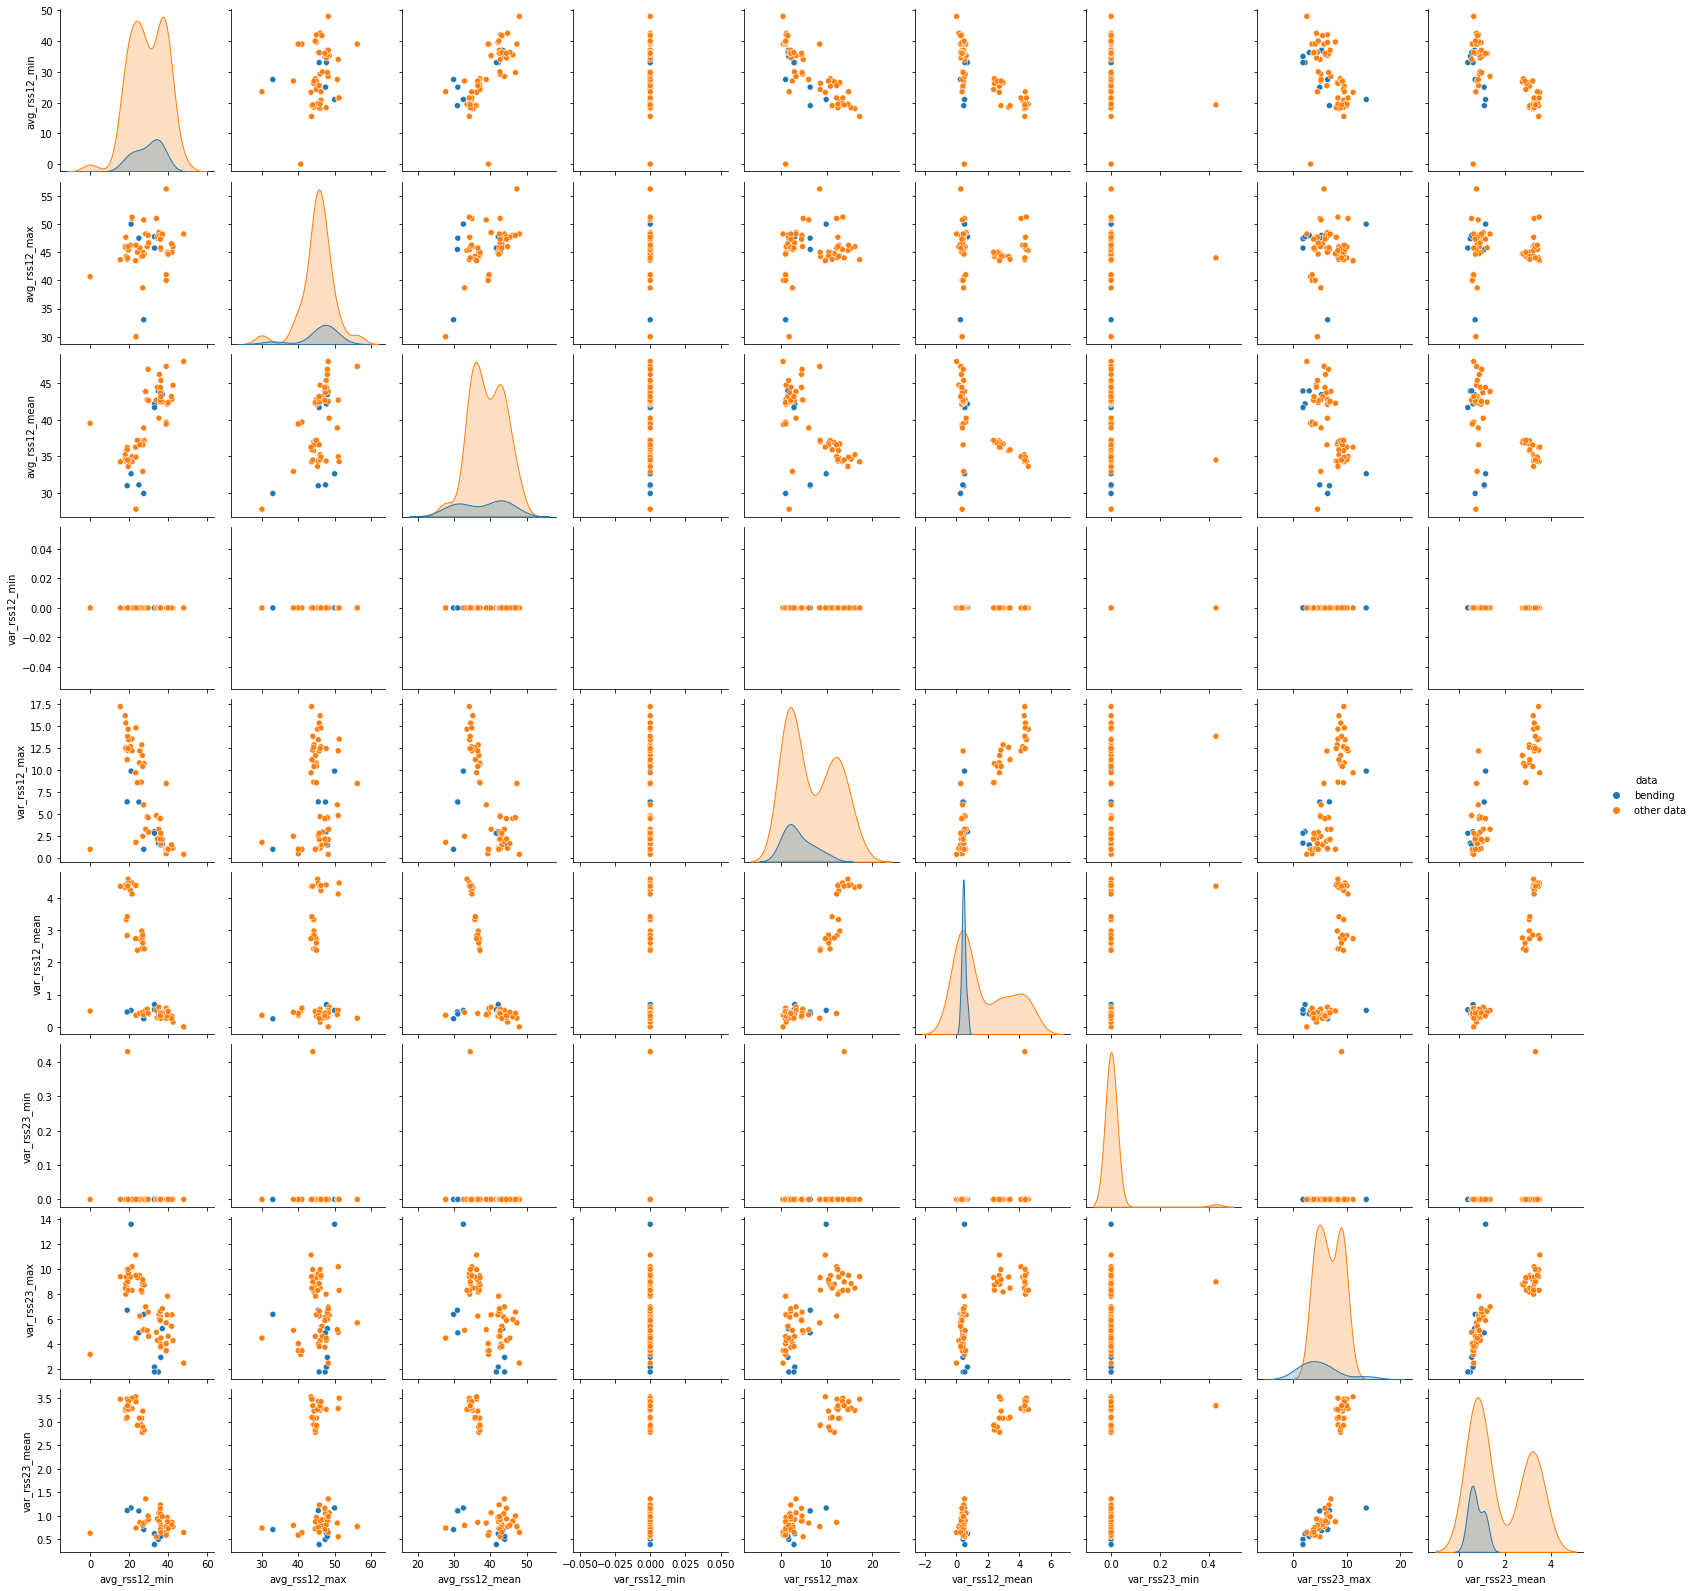

In [169]:
selected_time_domain_features = pd.DataFrame(columns = ["avg_rss12_min", "avg_rss12_max", "avg_rss12_mean",
                            "var_rss12_min", "var_rss12_max", "var_rss12_mean",
                            "var_rss23_min", "var_rss23_max", "var_rss23_mean"])




# now splitting stats based on training/test data 
train_other_data = []
test_other_data = []
train_bending =[]
test_bending=[]
bending1_data_range= range(1,8)
bending2_data_range = range(1,7)
other_data_range = range(1,16)
for file in folders:
    # handling bending data
    if file == 'bending1': 
        for i in bending1_data_range:
            # reading in the data 
            df= pd.read_csv(f'../data/{file}/dataset{i}.csv',skiprows= 4)
            if (i == 1) or (i==2):
                result = selected_statistics(df)
                test_bending.append(result)
            else:
                result = selected_statistics(df)
                train_bending.append(result)

    # bending data 2 has a different amount of instances
    elif file== 'bending2':
             # reading in the data 
            for i in bending2_data_range:
                df= pd.read_csv(f'../data/{file}/dataset{i}.csv',skiprows= 4)
                if (i == 1) or (i==2):
                    result = selected_statistics(df)
                    test_bending.append(result)
                else:
                    result = selected_statistics(df)
                    train_bending.append(result)
        
    # handling all other types of data             
    else:
        for i in other_data_range:
            df= pd.read_csv(f'../data/{file}/dataset{i}.csv',skiprows= 4)
            if (i == 1) or (i==2) or (i==3):
                result = selected_statistics(df)
                test_other_data.append(result)
            else:
                result = selected_statistics(df)
                train_other_data.append(result)



bending_train_df = pd.DataFrame(train_bending,columns= selected_time_domain_features.columns)
otherdata_train_df = pd.DataFrame(train_other_data,columns= selected_time_domain_features.columns)
# now plottting based on bending or not 
bending_train_df['data'] = 'bending'
otherdata_train_df['data']= 'other data'

final_df_training= pd.concat([bending_train_df,otherdata_train_df],axis = 0)
final_df_training= final_df_training.reset_index(drop=True)
sns.pairplot(data= final_df_training, hue='data')

In [170]:
final_df_training

,avg_rss12_min,avg_rss12_max,avg_rss12_mean,var_rss12_min,var_rss12_max,var_rss12_mean,var_rss23_min,var_rss23_max,var_rss23_mean,data
0,35.00,47.40,43.954500,0.0,1.70,0.426250,0.00,1.79,0.493292,bending
1,33.00,47.75,42.179813,0.0,3.00,0.696042,0.00,2.18,0.613521,bending
2,33.00,45.75,41.678063,0.0,2.83,0.535979,0.00,1.79,0.383292,bending
3,37.00,48.00,43.454958,0.0,1.58,0.378083,0.00,5.26,0.679646,bending
4,36.25,48.00,43.969125,0.0,1.50,0.413125,0.00,2.96,0.555313,bending
...,...,...,...,...,...,...,...,...,...,...
64,19.50,45.33,33.586875,0.0,14.67,4.576562,0.00,8.32,3.259729,other data
65,19.75,45.50,34.322750,0.0,13.47,4.456333,0.00,9.67,3.432562,other data
66,19.50,46.00,34.546229,0.0,12.47,4.371958,0.00,10.00,3.338125,other data
67,23.50,46.25,34.873229,0.0,14.82,4.380583,0.00,9.51,3.424646,other data


#### ii. Splitted Plots

In [58]:
# reference -- https://stackoverflow.com/questions/8002217/how-do-you-check-whether-a-number-is-divisible-by-another-number

def statistics_parts(dataframe, splits):
    empty_list = []
    frames = np.array_split(dataframe, splits,axis=0)
    for x in frames:
        empty_list.append(x.reset_index(drop=True))
    
    final_df = pd.concat(empty_list,axis=1)
    final_df = final_df.drop(columns = '# Columns: time')
    stats = final_df.describe()
    
    # creating a new dataframe
    column_names = []
    for x in stats.columns:
        min_col = x+"_min"
        max_col = x+"_max"
        mean_col= x+"_mean"
        column_names.append(min_col)
        column_names.append(max_col)
        column_names.append(mean_col)
    # getting all the stats
    counter = 0
    all_elements = []
    for i in range(len(stats.columns)):
        stats_min = stats.iloc[3,i]
        stats_max = stats.iloc[7,i]
        stats_mean = stats.iloc[1,i]
        all_elements.append(stats_min)
        all_elements.append(stats_max)
        all_elements.append(stats_mean)
    # appending the data in order
    N= len(column_names)
    row = [all_elements[n:n+N] for n in range(0, len(all_elements), N)]
    # Putting it all together
    final_df = pd.DataFrame(row,columns = column_names)
    return final_df

In [59]:
# now splitting based on number of parts
def read_data(num_parts):
    folders= ['bending1', 'bending2','cycling','lying','sitting','standing','walking']
    train_other_data = []
    test_other_data = []
    train_bending =[]
    test_bending=[]
    bending1_data_range= range(1,8)
    bending2_data_range = range(1,7)
    other_data_range = range(1,16)
    for file in folders:
        # handling bending data
        if file == 'bending1': 
            for i in bending1_data_range:
                # reading in the data 
                df= pd.read_csv(f'../data/{file}/dataset{i}.csv',skiprows= 4)
                if (i == 1) or (i==2):
                    result = statistics_parts(df,num_parts)
                    test_bending.append(result)
                else:
                    result = statistics_parts(df,num_parts)
                    train_bending.append(result)

        # bending data 2 has a different amount of instances
        elif file== 'bending2':
                 # reading in the data 
                for i in bending2_data_range:
                    df= pd.read_csv(f'../data/{file}/dataset{i}.csv',skiprows= 4)
                    if (i == 1) or (i==2):
                        result = statistics_parts(df,num_parts)
                        test_bending.append(result)
                    else:
                        result = statistics_parts(df,num_parts)
                        train_bending.append(result)

        # handling all other types of data             
        else:
            for i in other_data_range:
                df= pd.read_csv(f'../data/{file}/dataset{i}.csv',skiprows= 4)
                if (i == 1) or (i==2) or (i==3):
                    result = statistics_parts(df,num_parts)
                    test_other_data.append(result)
                else:
                    result = statistics_parts(df,num_parts)
                    train_other_data.append(result)


    # making training data
    bending_train_df = pd.concat(train_bending, ignore_index=True)
    bending_train_df['data'] = 'bending'
    otherdata_train_df = pd.concat(train_other_data, ignore_index=True)
    otherdata_train_df['data']= 'other data'
    final_df_training= pd.concat([bending_train_df,otherdata_train_df],axis = 0)
    final_df_training =final_df_training.reset_index(drop=True)
    
    # making testing data
    bending_test_df = pd.concat(test_bending, ignore_index=True)
    bending_test_df['data'] = 'bending'
    otherdata_test_df = pd.concat(test_other_data, ignore_index=True)
    otherdata_test_df['data']= 'other data'
    final_df_test= pd.concat([bending_test_df,otherdata_test_df],axis = 0)
    final_df_test =final_df_test.reset_index(drop=True)

    return final_df_training, final_df_test




In [173]:

# reading number of parts = 2 and getting the training dataframe 
all_columns = read_data(2)[0]
columns_1_2_6 = all_columns[["avg_rss12_min", "avg_rss12_max", "avg_rss12_mean",
                            "var_rss12_min", "var_rss12_max", "var_rss12_mean",
                            "var_rss23_min", "var_rss23_max", "var_rss23_mean",'data']]
columns_1_2_6

,avg_rss12_min,avg_rss12_min,avg_rss12_max,avg_rss12_max,avg_rss12_mean,avg_rss12_mean,var_rss12_min,var_rss12_min,var_rss12_max,var_rss12_max,var_rss12_mean,var_rss12_mean,var_rss23_min,var_rss23_min,var_rss23_max,var_rss23_max,var_rss23_mean,var_rss23_mean,data
0,36.50,35.00,46.50,47.40,44.057167,43.851833,0.0,0.00,1.50,1.70,0.381042,0.471458,0.00,0.00,1.79,1.50,0.598250,0.388333,bending
1,33.75,33.00,47.75,46.00,43.278875,41.080750,0.0,0.00,3.00,2.86,0.673292,0.718792,0.00,0.00,1.53,2.18,0.640958,0.586083,bending
2,33.00,39.25,45.75,43.67,41.621208,41.734917,0.0,0.00,2.83,1.12,0.623083,0.448875,0.00,0.00,1.79,1.50,0.419083,0.347500,bending
3,39.00,37.00,48.00,46.50,44.117042,42.792875,0.0,0.00,1.30,1.58,0.250042,0.506125,0.00,0.00,5.26,4.06,0.815417,0.543875,bending
4,36.67,36.25,45.00,48.00,43.486208,44.452042,0.0,0.00,1.30,1.50,0.378667,0.447583,0.00,0.00,2.28,2.96,0.524875,0.585750,bending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,19.50,22.25,45.00,45.33,33.334500,33.839250,0.0,0.00,11.78,14.67,4.408083,4.745042,0.00,0.43,8.29,8.32,3.229167,3.290292,other data
65,20.33,19.75,44.50,45.50,34.036750,34.608750,0.0,0.00,13.47,12.50,4.778292,4.134375,0.47,0.00,8.41,9.67,3.543708,3.321417,other data
66,19.50,20.25,43.33,46.00,34.033875,35.058583,0.0,0.00,12.47,12.28,4.574625,4.169292,0.00,0.00,10.00,8.64,3.244042,3.432208,other data
67,24.33,23.50,44.00,46.25,34.920792,34.825667,0.0,0.43,14.82,12.26,4.177958,4.583208,0.00,0.00,9.18,9.51,3.430625,3.418667,other data


In this plot, I see a better how the data is distributed. Plot 2ai was hard to tell.
Also, in this plot it is much easier to see the clusters of data


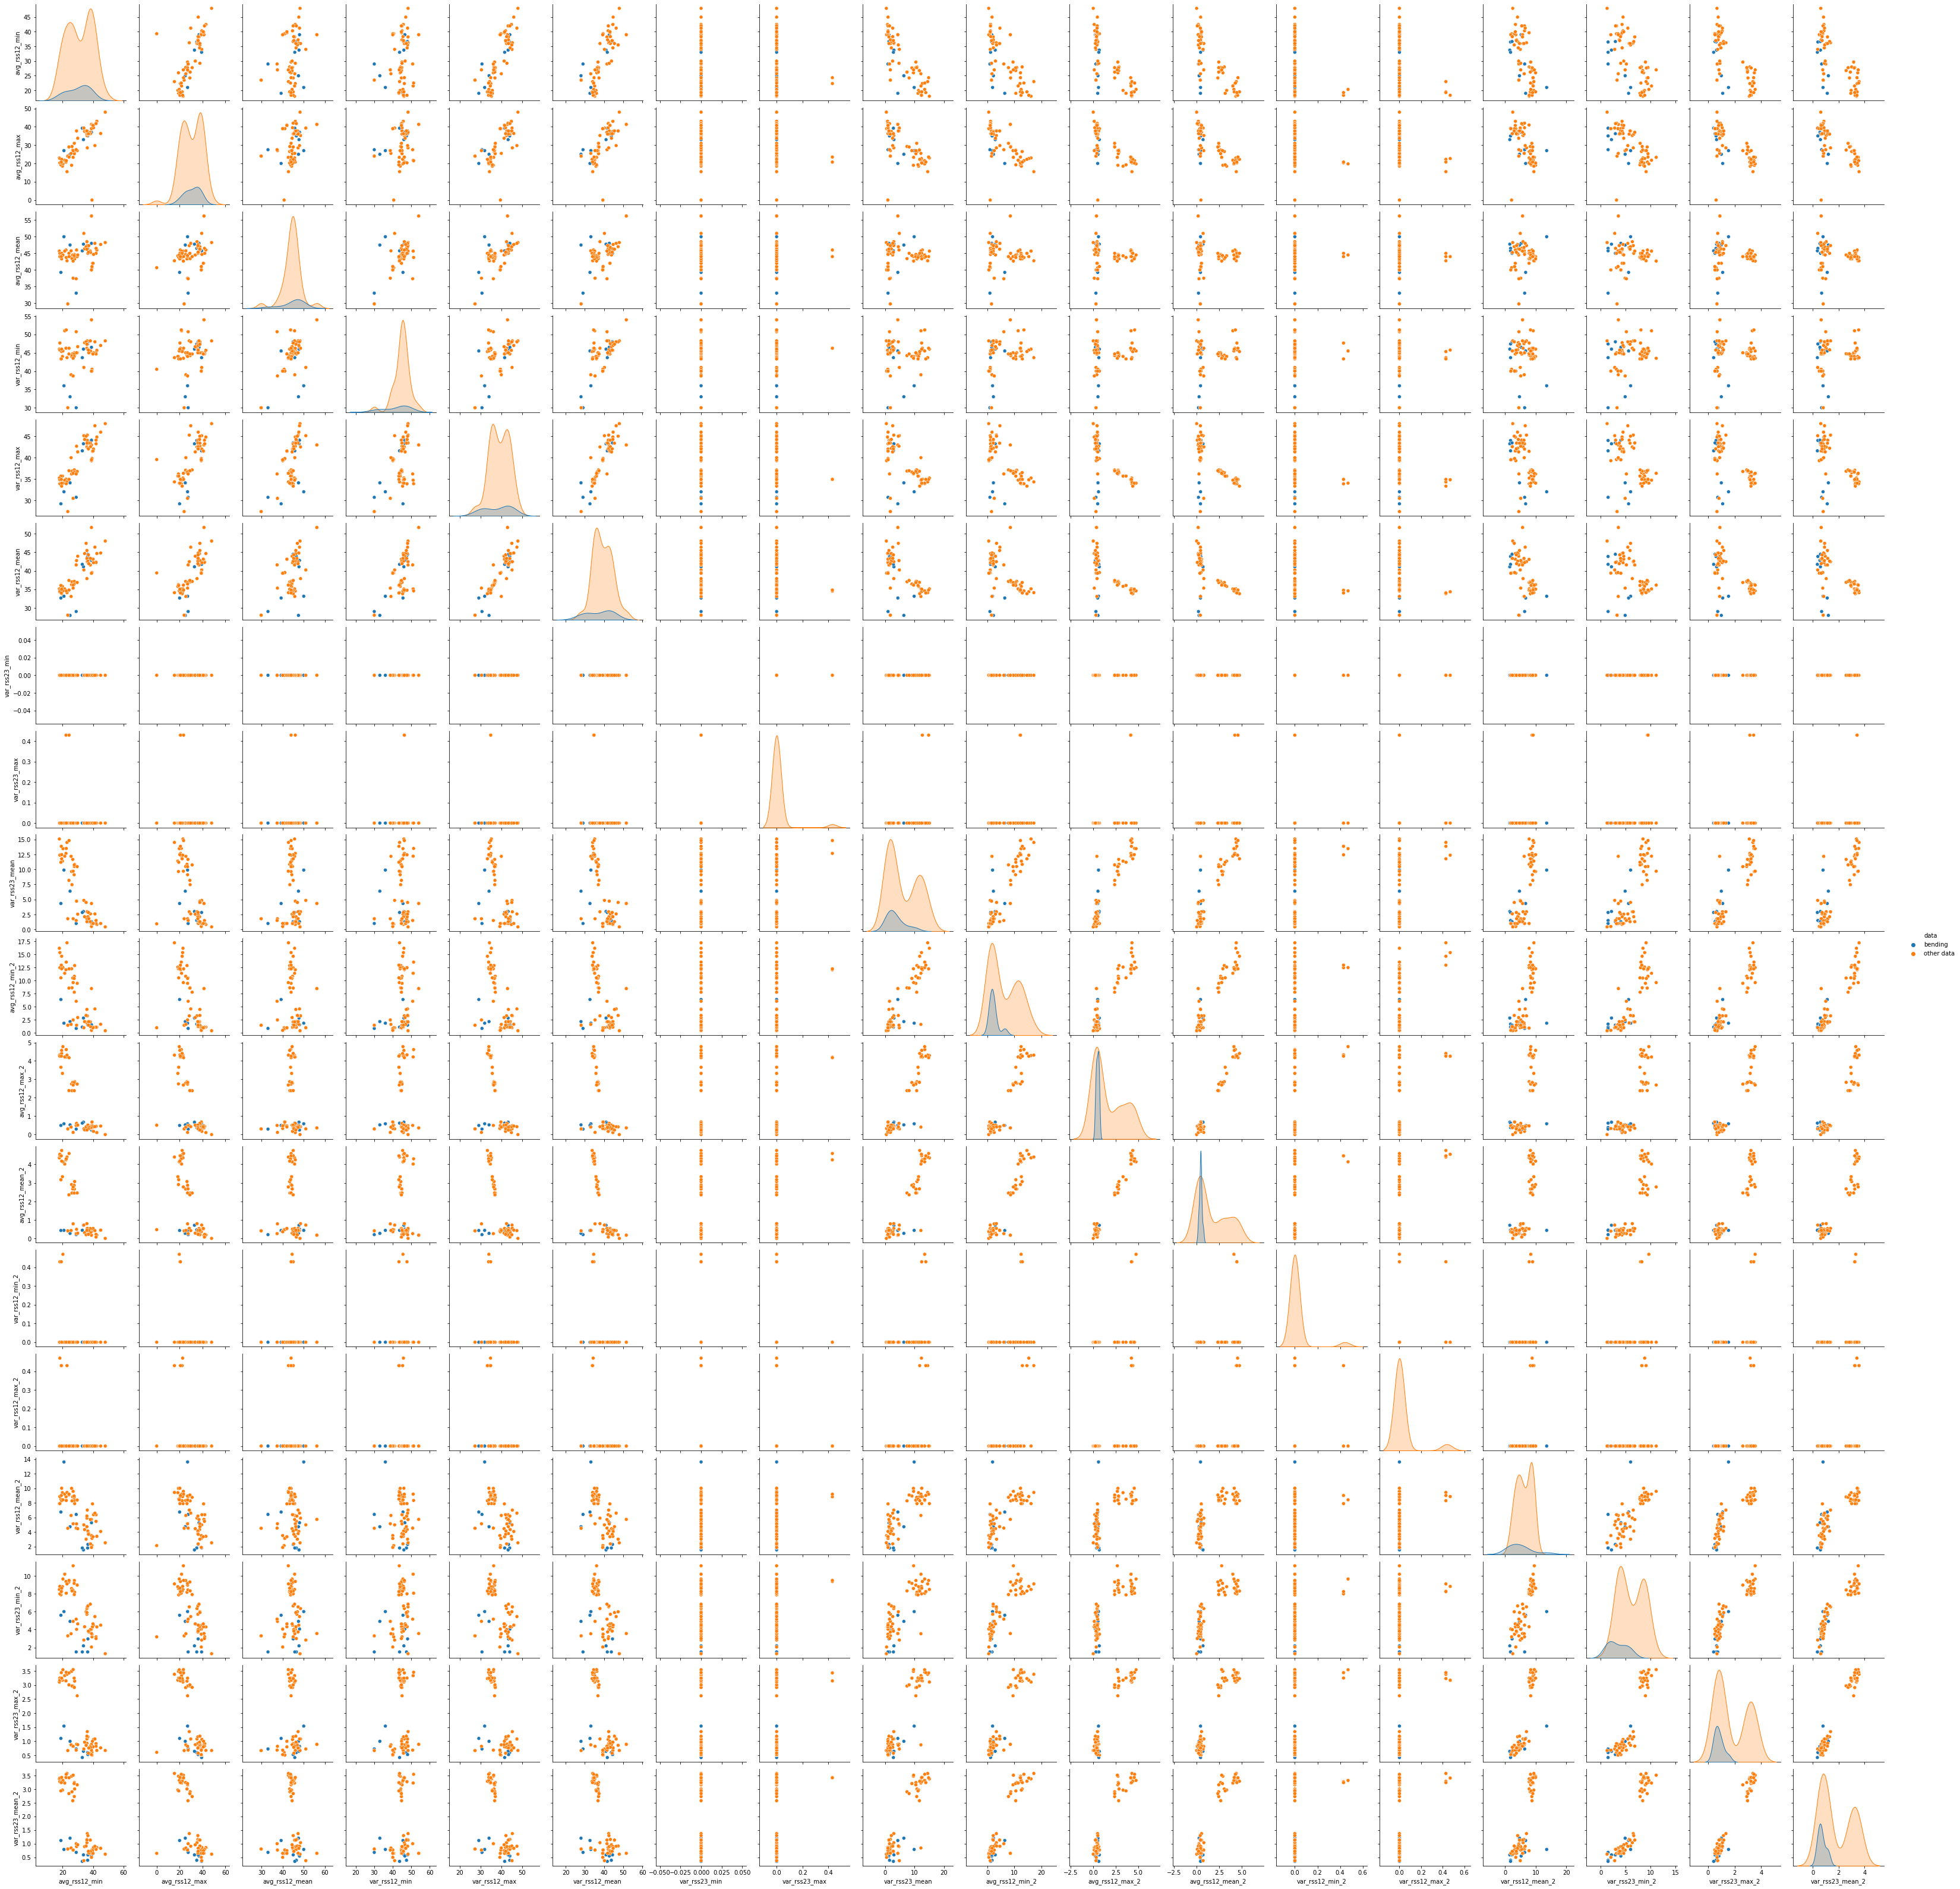

In [174]:
# now renaming some of the columns so there is no duplicate values for pairplot
columns_1_2_6.columns = ["avg_rss12_min", "avg_rss12_max", "avg_rss12_mean",
                            "var_rss12_min", "var_rss12_max", "var_rss12_mean",
                            "var_rss23_min", "var_rss23_max", "var_rss23_mean",
                        "avg_rss12_min_2", "avg_rss12_max_2", "avg_rss12_mean_2",
                            "var_rss12_min_2", "var_rss12_max_2", "var_rss12_mean_2",
                            "var_rss23_min_2", "var_rss23_max_2", "var_rss23_mean_2",'data']

sns.pairplot(data= columns_1_2_6, hue='data')
print('In this plot, I see a better how the data is distributed. Plot 2ai was hard to tell.')
print('Also, in this plot it is much easier to see the clusters of data')

#### iii. Time Series Segments

In [77]:
# Reference -- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html


best_fit_score = []
n_features = []
test_score_list = []
number_splits= range(1,21)
for x in number_splits:
    # splitting the data
    training_data = read_data(x)[0]
    x_columns_train = list(training_data.columns[0:-1])
    x_train = training_data[x_columns_train]
    y_data_train = training_data[['data']]
    y_train = y_data_train.replace(['other data', 'bending'],[0, 1])
    
    std_scale = StandardScaler().fit(x_train)
    x_train = std_scale.transform(x_train)
    # modeling
    rfecv = RFECV(estimator = LogisticRegression(solver = "lbfgs"), cv=StratifiedKFold(n_splits= 5), scoring = 'accuracy')
    rfecv.fit(x_train,y_train)
    
    #test data
    test_data = read_data(x)[1]
    x_columns = list(test_data.columns[0:-1])
    x_test = test_data[x_columns]
    y_data_test = test_data[['data']]
    y_test = y_data_test.replace(['other data', 'bending'],[0, 1])
    x_test  = std_scale.transform(x_test)

    
    y_pred_test = rfecv.predict(x_test)
    test_score = accuracy_score(y_test, y_pred_test)
    
    # now getting the data and scores
    test_score_list.append(test_score)
    n_features.append(rfecv.n_features_)
    best_fit_score.append(max(rfecv.cv_results_["mean_test_score"]))
    print("L=",x,'is done!')
    

L= 1 is done!
L= 2 is done!
L= 3 is done!
L= 4 is done!
L= 5 is done!
L= 6 is done!
L= 7 is done!
L= 8 is done!
L= 9 is done!
L= 10 is done!
L= 11 is done!
L= 12 is done!
L= 13 is done!
L= 14 is done!
L= 15 is done!
L= 16 is done!
L= 17 is done!
L= 18 is done!
L= 19 is done!
L= 20 is done!


In [78]:
l = list(range(1,21))
results = list(zip(l,n_features,best_fit_score,test_score_list))
result_df = pd.DataFrame(results,columns = ['L',"Number of Features",'Best Training Accuracy Score','Test Score'])
print(result_df)
print('')
print('')
print('')

print('The best L is 1 with the highest testing accuracy of 94.57%, eventhough L10 has a higher testing accuracy, it is ovefit due to the amount of features used.')
print('The best L and P combination is 1 and 4 features')

     L  Number of Features  Best Training Accuracy Score  Test Score
0    1                   4                      0.985714    0.947368
1    2                   1                      0.957143    0.894737
2    3                   2                      0.971429    0.947368
3    4                   2                      0.971429    0.947368
4    5                   1                      0.957143    0.947368
5    6                  45                      0.971429    0.947368
6    7                  36                      0.971429    0.947368
7    8                   4                      0.941758    0.947368
8    9                   5                      0.957143    0.947368
9   10                 281                      0.941758    1.000000
10  11                   7                      0.942857    0.947368
11  12                   8                      0.942857    0.947368
12  13                 193                      0.971429    0.947368
13  14                   4        

The wrong way to preform cross validation would be to do the feature selection and not during fitting the logistic regression. The right way would be to do CV at both steps. Also, because one class is much smaller (bending), we need to preform stratified cross validation

#### iv. Confusion Matrix

No classes were misclassified
The accuracy score is 1.0


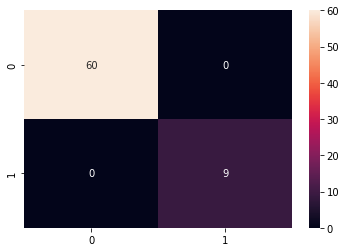

In [181]:
# reference --https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# reference -- https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea




# to pick a particular set of features we need to use the rfe package (RFECV doesnt allow it)
model = LogisticRegression()
rfe = RFE(model, n_features_to_select= 4)

# getting the training data 
training_data = read_data(1)[0]
x_train = training_data.iloc[:,0:-1]
y_data = training_data.iloc[:,-1]
y_train = y_data.replace(['other data', 'bending'],[0, 1])
# fitting the data 
rfe.fit(x_train,y_train)
y_pred= rfe.predict(x_train)
matrix = confusion_matrix(y_train, y_pred)
sns.heatmap(matrix, annot=True)
print('No classes were misclassified')
print('The accuracy score is', metrics.accuracy_score(y_train, y_pred))

AUC is 1.00 for the train data


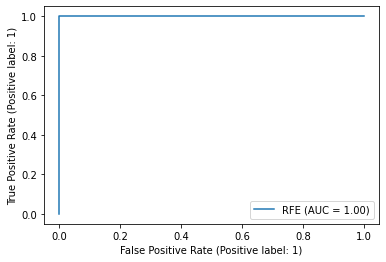

In [182]:
# ROC curve
# reference -- https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_roc_curve.html
RocCurveDisplay.from_estimator(rfe, x_train, y_train) 

print('AUC is 1.00 for the train data')

In [54]:
model = sm.Logit(y_train, x_train).fit(method='bfgs')
print(model.summary())
print('')
print('')
print('')
print('Data is linearly seperable so regular logistic regression wont work')

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
                           Logit Regression Results                           
Dep. Variable:                   data   No. Observations:                   69
Model:                          Logit   Df Residuals:                       53
Method:                           MLE   Df Model:                           15
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                   1.000
Time:                        16:25:48   Log-Likelihood:            -8.3481e-06
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 3.263e-06
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
avg_rss12_min     -1.9742   7.

#### v. Test Classifier

The accuracy score is 1.0
The accuracy is also 1.0 which is the same as the training set


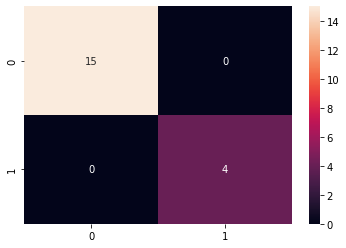

In [183]:
# reference --https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# reference -- https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea




# to pick a particular set of features we need to use the rfe package (RFECV doesnt allow it)
model = LogisticRegression()
rfe = RFE(model, n_features_to_select= 4)

#getting test data 
test_data = read_data(1)[1]
x_test = test_data.iloc[:,0:-1]
y_data_t = test_data.iloc[:,-1]
y_test = y_data_t.replace(['other data', 'bending'],[0, 1])
std_scale = StandardScaler().fit(x_test)
x_test = std_scale.transform(x_test)

# fitting the data 
rfe.fit(x_test,y_test)
y_pred= rfe.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True)
print('The accuracy score is', metrics.accuracy_score(y_test, y_pred))
print('The accuracy is also 1.0 which is the same as the training set')

#### vi. Separation

The data is linearly seperable so logistic regression is having problems. The algorithm will keep iterating because the maximum liklihood estimator goes to infinity

#### vii. Imbalance

The classes are now even and it has a 100% accuracy like before. The ROC and AOC is same as before.


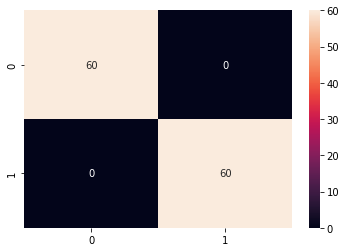

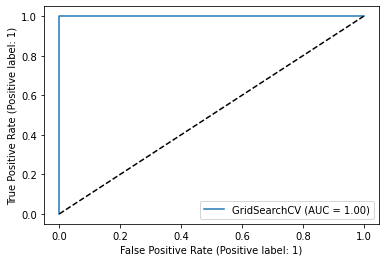

In [37]:
# using training data


# reference --https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5
# reference -- https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn


# to pick a particular set of features we need to use the rfe package (RFECV doesnt allow it)

# getting the training data 
training_data = read_data(1)[0]
x_train = training_data[['avg_rss12_min', 'avg_rss12_max', 'avg_rss12_mean', 'var_rss12_min',
       'var_rss12_max', 'var_rss12_mean', 'avg_rss13_min', 'avg_rss13_max',
       'avg_rss13_mean', 'var_rss13_min', 'var_rss13_max', 'var_rss13_mean',
       'avg_rss23_min', 'avg_rss23_max', 'avg_rss23_mean', 'var_rss23_min',
       'var_rss23_max', 'var_rss23_mean']]
y_data = training_data['data']
y_train = y_data.replace(['other data', 'bending'],[0, 1])

std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(x_train,y_train)
# fitting the data using grid search and adjusting the parameters
model = LogisticRegression()
parameters = [{'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)



grid_search.fit(X_train_res, y_train_res) 
y_pred = grid_search.predict(X_train_res)
matrix = confusion_matrix(y_train_res, y_pred)
sns.heatmap(matrix, annot=True)
RocCurveDisplay.from_estimator(grid_search, X_train_res, y_train_res) 
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

print('The classes are now even and it has a 100% accuracy like before. The ROC and AOC is same as before.')


### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [188]:
# reference -- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
# reference -- https://github.com/scikit-learn-contrib/sklearn-pandas/issues/197


best_score = []
n_features = []
number_splits= range(1,21)
for x in number_splits:
    # splitting the data
    training_data = read_data(x)[0]
    x_columns_train = list(training_data.columns[0:-1])
    x_train = training_data[x_columns_train]
    y_data_train = training_data[['data']]
    y_train = y_data_train.replace(['other data', 'bending'],[0, 1])
    
    std_scale = StandardScaler().fit(x_train)
    x_train = std_scale.transform(x_train)

    # modeling
    model = LogisticRegressionCV(cv=5,penalty='l1',solver='liblinear')
    model.fit(x_train,y_train)
    
    
    #test data
    test_data = read_data(x)[1]
    x_columns = list(test_data.columns[0:-1])
    x_test = test_data[x_columns]
    y_data_test = test_data[['data']]
    y_test = y_data_test.replace(['other data', 'bending'],[0, 1])
    x_test  = std_scale.transform(x_test)

    
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    
    test_score = accuracy_score(y_test, y_pred_test)
    training_score = accuracy_score(y_train, y_pred_train)
    
    print("L=",x, " Test Score=",test_score, "Training Score=",training_score)
    

L= 1  Test Score= 1.0 Training Score= 0.9855072463768116
L= 2  Test Score= 0.9473684210526315 Training Score= 0.9710144927536232
L= 3  Test Score= 0.8947368421052632 Training Score= 0.9710144927536232
L= 4  Test Score= 0.9473684210526315 Training Score= 0.9710144927536232
L= 5  Test Score= 0.9473684210526315 Training Score= 0.9710144927536232
L= 6  Test Score= 0.9473684210526315 Training Score= 0.9855072463768116
L= 7  Test Score= 0.9473684210526315 Training Score= 1.0
L= 8  Test Score= 0.9473684210526315 Training Score= 0.9710144927536232
L= 9  Test Score= 0.9473684210526315 Training Score= 1.0
L= 10  Test Score= 0.9473684210526315 Training Score= 1.0
L= 11  Test Score= 0.9473684210526315 Training Score= 1.0
L= 12  Test Score= 0.9473684210526315 Training Score= 1.0
L= 13  Test Score= 0.9473684210526315 Training Score= 1.0
L= 14  Test Score= 0.9473684210526315 Training Score= 0.9855072463768116
L= 15  Test Score= 0.9473684210526315 Training Score= 1.0
L= 16  Test Score= 0.9473684210526

#### ii. Comparison

The penalitized logistic regression is a bit easier computationally to use and gets better results with many of the training results having a accuracy score of 100% and most of the testing having 100% or close to 100%.

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [190]:
# reference -- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
# reference -- https://github.com/scikit-learn-contrib/sklearn-pandas/issues/197
# reference -- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
best_score = []
n_features = []
number_splits= range(1,21)
for x in number_splits:
    # splitting the data
    training_data = read_data(x)[0]
    x_columns_train = list(training_data.columns[0:-1])
    x_train = training_data[x_columns_train]
    y_data_train = training_data[['data']]
    y_train = y_data_train.replace(['other data', 'bending'],[0, 1])
    
    #normalizing data
    std_scale = StandardScaler().fit(x_train)
    x_train = std_scale.transform(x_train)
    
    # modeling
    model = LogisticRegressionCV(cv=5,penalty='l1',solver='saga',multi_class='multinomial')
    model.fit(x_train,y_train)
    
    
    #test data
    test_data = read_data(x)[1]
    x_columns = list(test_data.columns[0:-1])
    x_test = test_data[x_columns]
    y_data_test = test_data[['data']]
    y_test = y_data_test.replace(['other data', 'bending'],[0, 1])
    
    #normalizing data
    x_test = std_scale.transform(x_test)
    
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    
    
    test_score = accuracy_score(y_test, y_pred_test)
    training_score = accuracy_score(y_train, y_pred_train)
    
    print("L=",x, " Test Score=",test_score, "Training Score=",training_score, "Test Error =", 1-test_score)

L= 1  Test Score= 0.8947368421052632 Training Score= 0.9710144927536232 Test Error = 0.10526315789473684
L= 2  Test Score= 0.8947368421052632 Training Score= 0.9565217391304348 Test Error = 0.10526315789473684
L= 3  Test Score= 0.8947368421052632 Training Score= 0.9710144927536232 Test Error = 0.10526315789473684
L= 4  Test Score= 0.9473684210526315 Training Score= 0.9710144927536232 Test Error = 0.052631578947368474
L= 5  Test Score= 0.9473684210526315 Training Score= 0.9710144927536232 Test Error = 0.052631578947368474
L= 6  Test Score= 0.9473684210526315 Training Score= 0.9855072463768116 Test Error = 0.052631578947368474
L= 7  Test Score= 0.9473684210526315 Training Score= 0.9855072463768116 Test Error = 0.052631578947368474
L= 8  Test Score= 0.9473684210526315 Training Score= 0.9710144927536232 Test Error = 0.052631578947368474
L= 9  Test Score= 0.9473684210526315 Training Score= 1.0 Test Error = 0.052631578947368474
L= 10  Test Score= 0.9473684210526315 Training Score= 1.0 Test E

In [70]:
# now choosing the best model to do roc curve and confusion matrix, best model is l=4 and test error =  0.05
# reference = https://stackoverflow.com/questions/53886370/multi-class-multi-label-confusion-matrix-with-sklearn

# training data
training_data = read_data(4)[0]
x_columns_train = list(training_data.columns[0:-1])
x_train = training_data[x_columns_train]
y_data_train = training_data[['data']]
y_train = y_data_train.replace(['other data', 'bending'],[0, 1])
# normalizing 
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
                               
                               
model= LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial')
model.fit(x_train,y_train)

#test data
test_data = read_data(4)[1]
x_columns = list(test_data.columns[0:-1])
x_test = test_data[x_columns]
y_data_test = test_data[['data']]
y_test = y_data_test.replace(['other data', 'bending'],[0, 1])
    
#normalizing data
x_test = std_scale.transform(x_test)
    
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

    
    
test_score = accuracy_score(y_test, y_pred_test)
training_score = accuracy_score(y_train, y_pred_train)

y_unique_test = y_test['data'].unique()
y_unique_train = y_train['data'].unique()
mcm_test = multilabel_confusion_matrix(y_test, y_pred_test, labels = y_unique_test)
print('Test Data')
print(mcm_test)
print('Training Data')
mcm_train = multilabel_confusion_matrix(y_train, y_pred_train, labels = y_unique_train)
print(mcm_train)

Test Data
[[[15  0]
  [ 1  3]]

 [[ 3  1]
  [ 0 15]]]
Training Data
[[[60  0]
  [ 0  9]]

 [[ 9  0]
  [ 0 60]]]


Text(0.5, 1.0, 'Test Data')

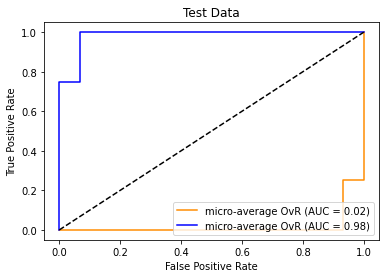

In [71]:
# reference -- https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

# microaveraging all the columns for multinomial logistic regression
y_pred_test = model.predict_proba(x_test)
y_pred_test_0 = np.array([item[0] for item in y_pred_test])
y_pred_test_1 = np.array([item[1] for item in y_pred_test])

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
ax = plt.gca()

RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_pred_test_0.ravel(),
    name="micro-average OvR",
    color="darkorange",ax=ax
)

RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_pred_test_1.ravel(),
    name="micro-average OvR",
    color="blue",ax=ax
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Data')

Text(0.5, 1.0, 'Train Data')

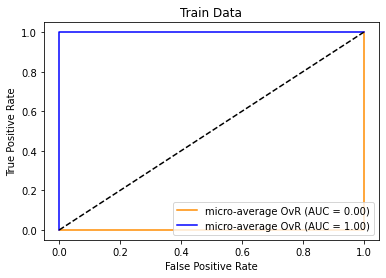

In [76]:
y_pred_train = model.predict_proba(x_train)
y_pred_train_0 = np.array([item[0] for item in y_pred_train])
y_pred_train_1 = np.array([item[1] for item in y_pred_train])

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_train)
ax = plt.gca()

RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_pred_train_0.ravel(),
    name="micro-average OvR",
    color="darkorange",ax=ax
)

RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_pred_train_1.ravel(),
    name="micro-average OvR",
    color="blue",ax=ax
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train Data')

#### ii. Naive Bayes

In [202]:
# multinomial native bayes 

# reference -- https://stackoverflow.com/questions/51194627/python-naive-bayes-with-cross-validation-using-gaussiannb-classifier



best_score = []
n_features = []
number_splits= range(1,21)
for x in number_splits:
    # splitting the data
    training_data = read_data(x)[0]
    x_columns_train = list(training_data.columns[0:-1])
    x_train = training_data[x_columns_train]
    y_data_train = training_data[['data']]
    y_train = y_data_train.replace(['other data', 'bending'],[0, 1])
    
    #normalizing data
    std_scale = MinMaxScaler().fit(x_train)
    x_train = std_scale.transform(x_train)
    
    # modeling
    skf = StratifiedKFold(n_splits=5)
    params = {}
    nb = MultinomialNB()
    gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True,error_score='raise')
    gs.fit(x_train,y_train)

    
    #test data
    test_data = read_data(x)[1]
    x_columns = list(test_data.columns[0:-1])
    x_test = test_data[x_columns]
    y_data_test = test_data[['data']]
    y_test = y_data_test.replace(['other data', 'bending'],[0, 1])
    
    #normalizing data
    x_test = std_scale.transform(x_test)
    y_pred_test = gs.predict(x_test)
    y_pred_train = gs.predict(x_train)

    
    
    test_score = accuracy_score(y_test, y_pred_test)
    training_score = accuracy_score(y_train, y_pred_train)

    
    print("L=",x, " Test Score=",test_score, "Training Score=",training_score, "Test Error =", 1-test_score)

L= 1  Test Score= 0.8947368421052632 Training Score= 0.8840579710144928 Test Error = 0.10526315789473684
L= 2  Test Score= 0.9473684210526315 Training Score= 0.9565217391304348 Test Error = 0.052631578947368474
L= 3  Test Score= 0.9473684210526315 Training Score= 0.855072463768116 Test Error = 0.052631578947368474
L= 4  Test Score= 0.8947368421052632 Training Score= 0.8260869565217391 Test Error = 0.10526315789473684
L= 5  Test Score= 0.8947368421052632 Training Score= 0.7681159420289855 Test Error = 0.10526315789473684
L= 6  Test Score= 0.7368421052631579 Training Score= 0.7246376811594203 Test Error = 0.26315789473684215
L= 7  Test Score= 0.7368421052631579 Training Score= 0.6956521739130435 Test Error = 0.26315789473684215
L= 8  Test Score= 0.6842105263157895 Training Score= 0.6666666666666666 Test Error = 0.3157894736842105
L= 9  Test Score= 0.6842105263157895 Training Score= 0.6666666666666666 Test Error = 0.3157894736842105
L= 10  Test Score= 0.6842105263157895 Training Score= 0.

In [204]:
# gaussian native bayes 

# reference -- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html



best_score = []
n_features = []
number_splits= range(1,21)
for x in number_splits:
    # splitting the data
    training_data = read_data(x)[0]
    x_columns_train = list(training_data.columns[0:-1])
    x_train = training_data[x_columns_train]
    y_data_train = training_data[['data']]
    y_train = y_data_train.replace(['other data', 'bending'],[0, 1])
    
    #normalizing data
    std_scale = MinMaxScaler().fit(x_train)
    x_train = std_scale.transform(x_train)
    
    # modeling
    skf = StratifiedKFold(n_splits=5)
    params = {}
    nb = GaussianNB()
    gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True,error_score='raise')
    gs.fit(x_train,y_train)

    
    #test data
    test_data = read_data(x)[1]
    x_columns = list(test_data.columns[0:-1])
    x_test = test_data[x_columns]
    y_data_test = test_data[['data']]
    y_test = y_data_test.replace(['other data', 'bending'],[0, 1])
    
    #normalizing data
    x_test = std_scale.transform(x_test)
    y_pred_test = gs.predict(x_test)
    y_pred_train = gs.predict(x_train)

    
    
    test_score = accuracy_score(y_test, y_pred_test)
    training_score = accuracy_score(y_train, y_pred_train)

    
    print("L=",x, " Test Score=",test_score, "Training Score=",training_score, "Test Error =", 1-test_score)

L= 1  Test Score= 0.5789473684210527 Training Score= 0.5072463768115942 Test Error = 0.42105263157894735
L= 2  Test Score= 0.5263157894736842 Training Score= 0.4782608695652174 Test Error = 0.4736842105263158
L= 3  Test Score= 0.5263157894736842 Training Score= 0.4927536231884058 Test Error = 0.4736842105263158
L= 4  Test Score= 0.5263157894736842 Training Score= 0.4927536231884058 Test Error = 0.4736842105263158
L= 5  Test Score= 0.5263157894736842 Training Score= 0.5362318840579711 Test Error = 0.4736842105263158
L= 6  Test Score= 0.47368421052631576 Training Score= 0.5507246376811594 Test Error = 0.5263157894736843
L= 7  Test Score= 0.47368421052631576 Training Score= 0.5942028985507246 Test Error = 0.5263157894736843
L= 8  Test Score= 0.47368421052631576 Training Score= 0.6231884057971014 Test Error = 0.5263157894736843
L= 9  Test Score= 0.5263157894736842 Training Score= 0.6811594202898551 Test Error = 0.4736842105263158
L= 10  Test Score= 0.47368421052631576 Training Score= 0.666

#### ii. Comparison

L1 penalized multinomial regression had by far the best training accuracy and test accuracy throughout the iterations. The highest accuracy I achived on the L1 pentalized multinmoial regression was 94.7%. The highest accuracy on the multinomial native bayes was 94.7 on l=2 but preformed worse at most ls compared to the penalized multinomial regression. The worst was the gaussian native bayes, and I achieved an accuracy of 73.6% at l=16.

## 3. ISLR 4.8.3

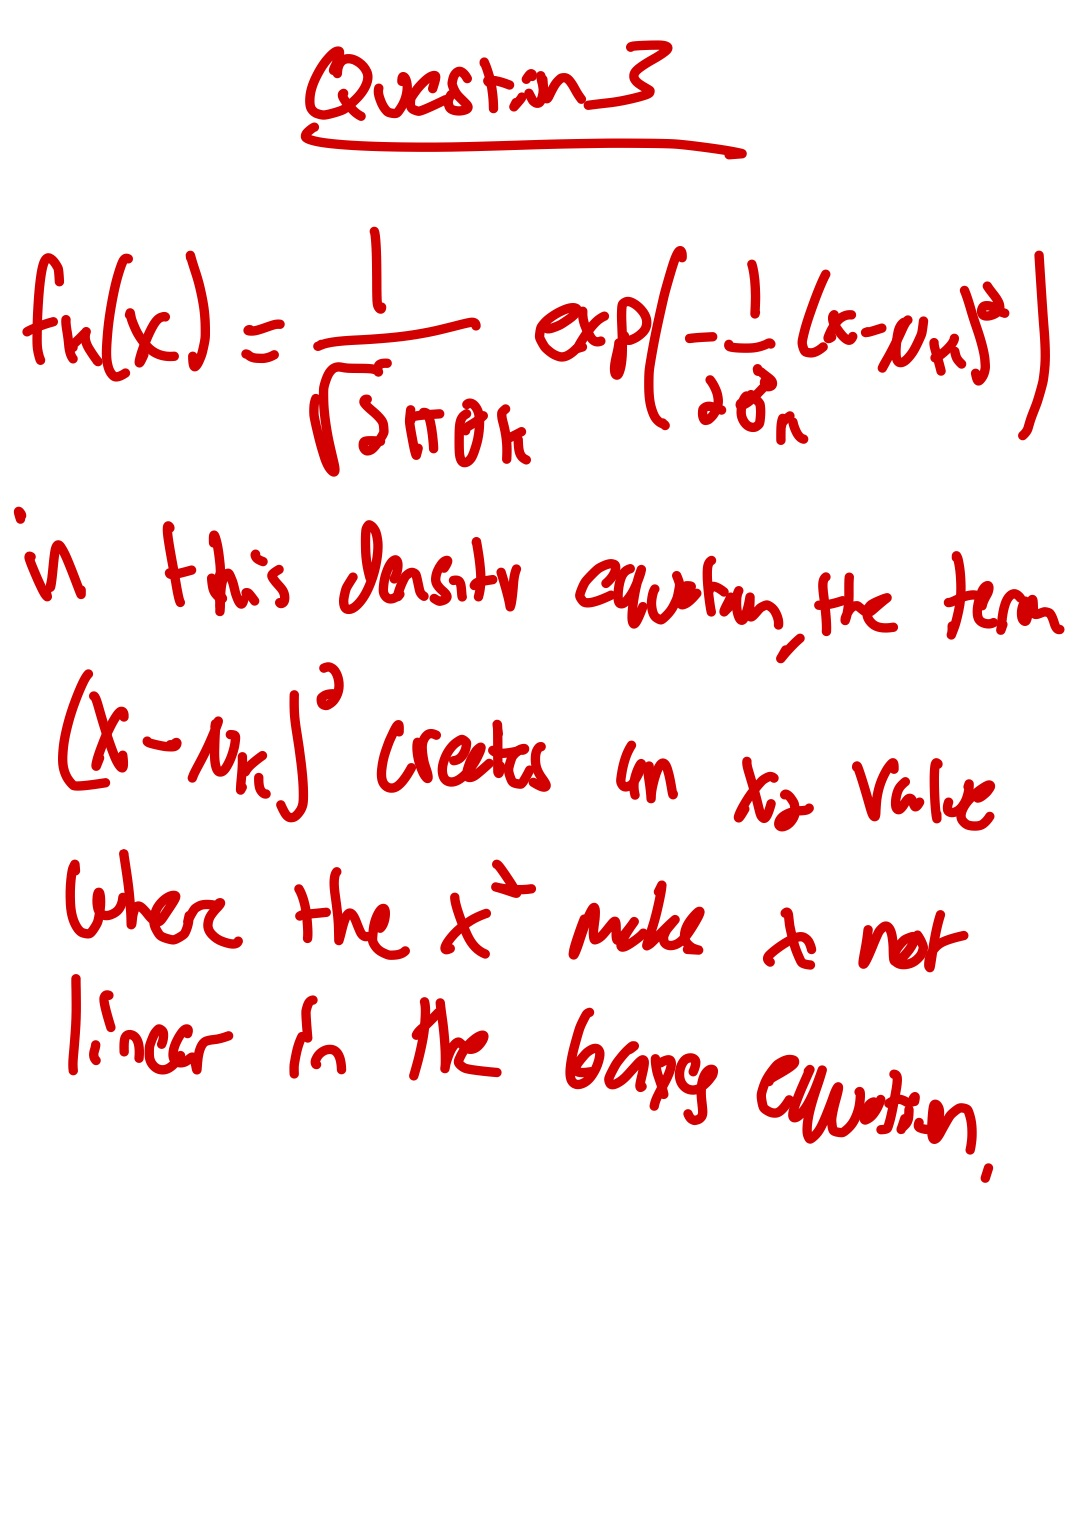



## 4. ISLR 4.8.7

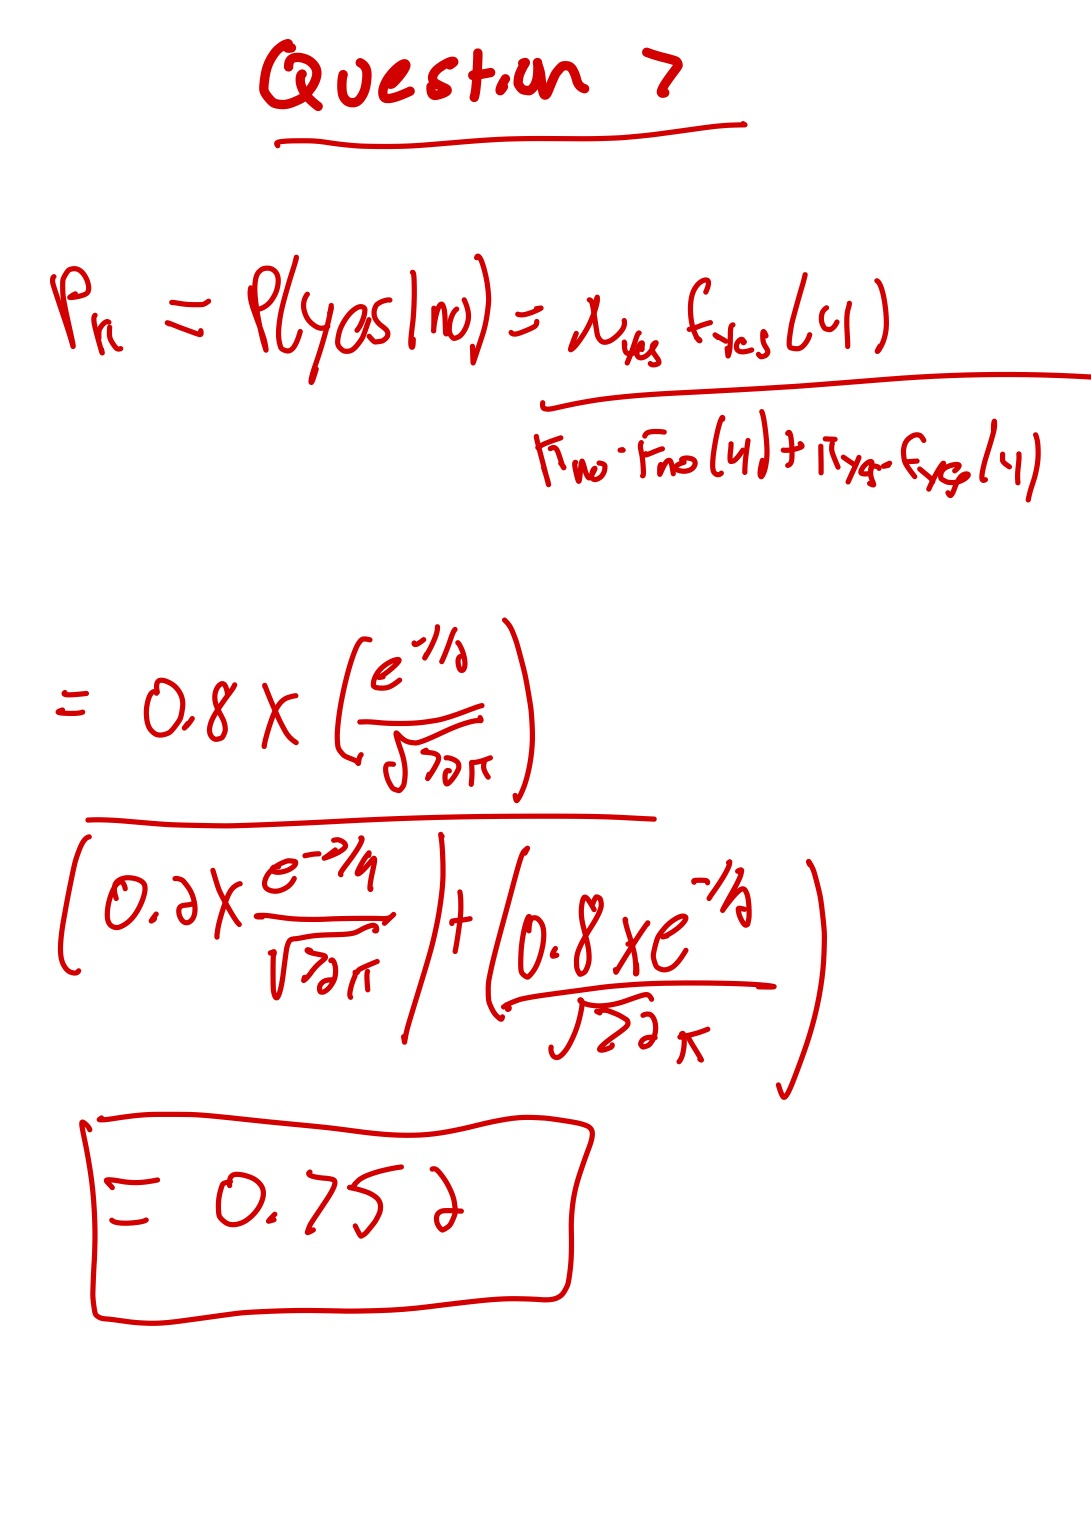

## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9